In [2]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split

## 2.3.5 결정 트리
- 분류와 회귀 문제에 널리 사용되는 모델
- 결정에 다다르기 위해 예/아니오 질문을 통해 학습 (스무고개 놀이 질문과 비슷)

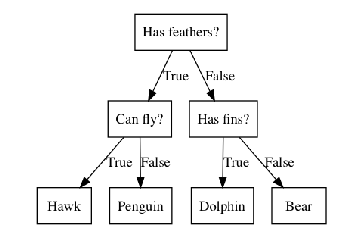

In [3]:
mglearn.plots.plot_animal_tree()

### 결정 트리 만들기
- two_moons라는 데이터 셋을 가지고 결정 트리에 학습
  - 결정트리를 학습한다는 것은 정답에 가장 빨리 도달하는 예/아니오 질문 목록을 학습한다는 의미
  
####  예제 실습
- 클래스 0이 원, 클래스 1이 삼각형 모양의 데이터 포인트
- X[1] <= 0.0596 이라는 조건으로 데이터셋을 수평으로 나눔 (깊이 1의 결정 트리)
  - 루트 노드를 보면 클래스0은 50개, 클래스 1은 50개인 것으로 보임
  - 첫 번째 조건을 통과하면 참 분기에서는 클래스0이 2개, 클래스 1이 32개 거짓 분기에서는 클래스0이 48개, 클래스1이 18개
  - 이렇게 분류 조건을 추가하여 영역을 세분화하는 프로세스를 반복함
- 순수 노드: 한 개의 타깃값만 가진 리프노드를 순수노드라고 함

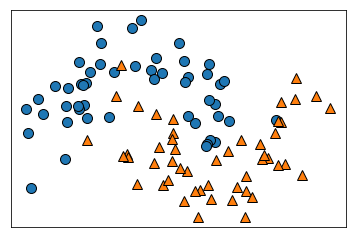

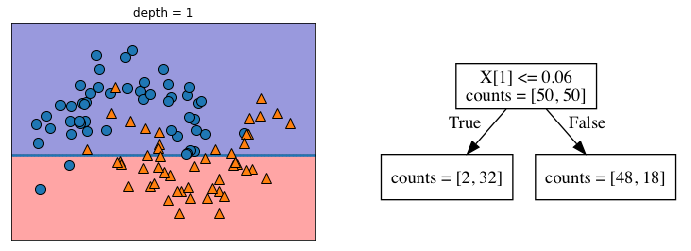

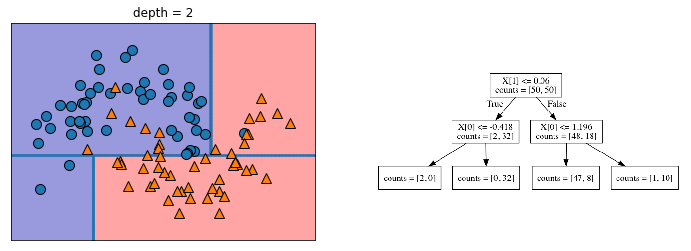

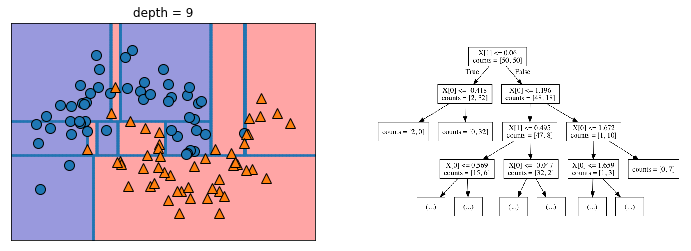

In [5]:
mglearn.plots.plot_tree_progressive()

### 결정 트리의 복잡도 제어하기
- 과대적합: 모든 리프 노드가 순수 노드가 될 때까지 진행하면 모델이 매우 복잡해지고 훈련 데이터셋에 오버핏팅됨
- 과대 적합을 막으려면?
  - 트리 생성을 일찍 중단 (사전 가지치기)
  - 트리를 만든 후 데이터 포인트가 적은 노드를 삭제 혹은 병합 (사후 가지치기 or 가지치기)
  - scikit-learn은 사전 가지치기만 지원
  
##### 실습
- 유방암 데이터셋을 이용하여 결정 트리 분류(**Classifier**) 모델 만들기

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42
)
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train) # 모델 학습

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


##### 실습
- 앞의 실습에서 사전 가지치기를 추가
  - 결정 트리의 깊이를 제한하지 않으면 무한정 깊어짐(복잡해짐) -> 오버피팅되어서 새로운 데이터에 잘 맞지 않음(일반화 되지 않음)
  - 일정 깊이에 도달하면 트리의 성장을 멈추게 할 수 있다. -> max_depth=4 옵션을 주면 연속된 질문을 최대 4개로 제한

In [8]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


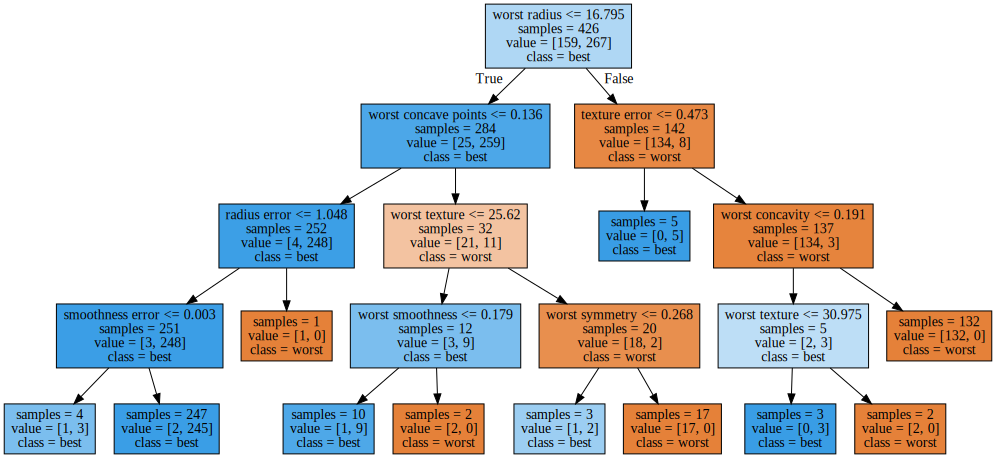

In [13]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree, out_file="tree.dot", class_names=["worst", "best"],
               feature_names=cancer.feature_names,
               impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### 트리의 특성 중요도
- 트리가 어떻게 작동하는지 요약하는 속성을 사용
- 널리 사용되는 속성은 특성 중요도 feature importance
  - 이 값은 0과 1 사이의 숫자
  - 각 Feature에 대해 0은 전혀 사용되지 않음, 1은 완벽하게 타겟 클래스를 예측 했다는 의미

In [14]:
print("특성 중요도:\n{}".format(tree.feature_importances_))

특성 중요도:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


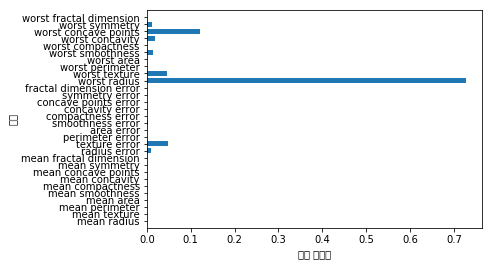

In [19]:
# 특성 중요도 시각화
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('특성 중요도')
    plt.ylabel('특성')
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(tree)

- 첫 번째 노드에서 사용한 "worst radius"라는 특성이 가장 중요한 특성으로 나타남
- 즉 첫 번째 노드에서 두 클래스를 꽤 잘 나누고 있다는 의미
- 어떤 특성의 특성 중요도가 낮다고 해서 이 특성이 유용하지 않다는 뜻은 아님
- 특성 중요도의 값은 worst radius가 중요하다고 알려주지만 높은 반지름이 양성을 의미하는지 악성을 의미하는지는 모름

<u>특성과 클래스 사이에는 간단하지 않은 관계가 있음</u>

Feature importances: [0. 1.]


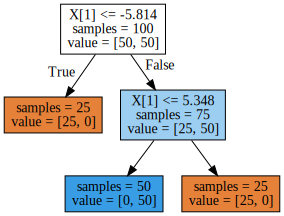

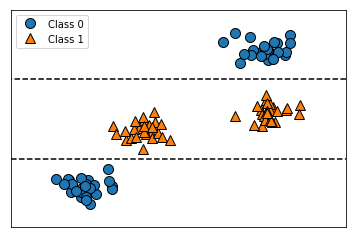

In [21]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

##### 실습
- 컴퓨터 메모리 가격 동향 데이터셋을 이용한 회귀 결정트리 모델 만들기


In [24]:
import pandas as pd
import os

ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))
print(ram_prices)

     Unnamed: 0     date         price
0             0  1957.00  4.110418e+08
1             1  1959.00  6.794772e+07
2             2  1960.00  5.242880e+06
3             3  1965.00  2.642412e+06
4             4  1970.00  7.340030e+05
5             5  1973.00  3.993600e+05
6             6  1974.00  3.145730e+05
7             7  1975.00  4.218880e+05
8             8  1975.08  1.802240e+05
9             9  1975.25  6.758400e+04
10           10  1975.75  4.992000e+04
11           11  1976.00  4.070400e+04
12           12  1976.17  4.896000e+04
13           13  1976.42  2.304000e+04
14           14  1976.58  3.200000e+04
15           15  1977.08  3.680000e+04
16           16  1978.17  2.800000e+04
17           17  1978.25  2.944000e+04
18           18  1978.33  1.920000e+04
19           19  1978.50  2.400000e+04
20           20  1978.58  1.600000e+04
21           21  1978.75  1.520000e+04
22           22  1979.00  1.052800e+04
23           23  1979.75  6.704000e+03
24           24  1980.00 

- 날짜(date) 피처 하나만으로 2000년 이전 데이터로 학습, 2000년 후 가격 예측
- 이걸 DecisionTreeRegressor와 LinearRegression을 비교